In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import math
import random
import numpy as np
from keras.utils import to_categorical
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from keras.optimizers import Adadelta
import pandas as pd
from sklearn.metrics import confusion_matrix
import math

Using TensorFlow backend.


In [2]:
#查看数字手写图

In [3]:
def drawDigit(position, image, title):
    plt.subplot(*position)
    plt.imshow(image.reshape(-1, 28), cmap='gray_r')
    plt.axis('off')
    plt.title(title)

In [4]:
def batchDraw(batch_size):
    selected_index = random.sample(range(len(y_Train)), k = batch_size)
    images, labels = x_Train[selected_index], y_Train[selected_index]
    image_num = images.shape[0]
    row_num = math.ceil(image_num ** 0.5)
    #print("k = %d, images.shape = %d, image_num = %d, row_num = %d", batch_size, images.shape, image_num, row_num)
    column_num = row_num
    plt.figure(figsize=(row_num, column_num))
    for i in range(row_num):
        for j in range(column_num):
            index = i * column_num + j
            if index < image_num:
                position = (row_num, column_num, index + 1)#把图片放在几行几列第几个
                image = images[index]
                title = 'actual:%d' %(labels[index])
                drawDigit(position, image, title)

In [5]:
###查看数据情况
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()
#print(X_train.shape, y_train.shape)
#print((X_test.shape, y_test.shape))
###查看数据情况

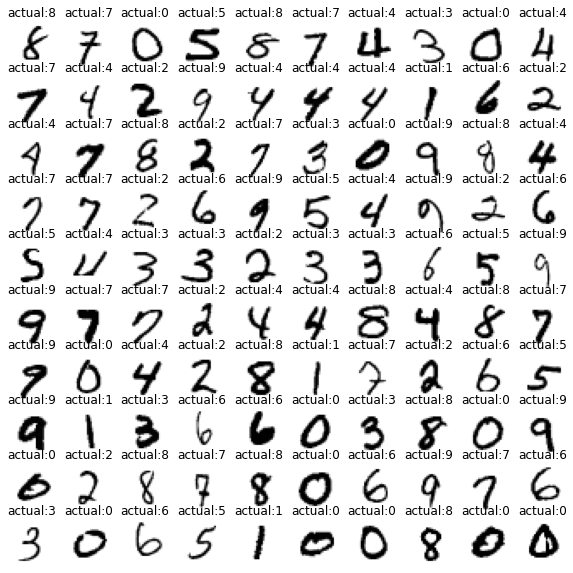

In [6]:
###查看数字手写图
batchDraw(100)
plt.show()
###查看数字手写图

In [7]:
###data preprocessing数据预处理
np.random.seed(9)
x_Train4D = x_Train.reshape(x_Train.shape[0], 28, 28, 1).astype('float32')  # 60000，28，28，1
x_Test4D = x_Test.reshape(x_Test.shape[0], 28, 28, 1).astype('float32')  # 10000，28，28，1
# 归一化
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255
# one-hot Encoding
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

In [8]:
###build model
model = Sequential()
# 卷积层1，输入28，28 输出 28，28
model.add(Conv2D(filters=16,
                 kernel_size=(5, 5),
                 padding='same',
                 input_shape=(28, 28, 1),
                 activation='relu'))
# 池化层1，输入图片28，28 输出14，14
model.add(MaxPooling2D(pool_size=(2, 2)))
# 卷积层2，输入图片14，14 输出 14，14
model.add(Conv2D(filters=36,
                 kernel_size=(5, 5),
                 padding='same',
                 activation='relu'))
# 池化层2，输入图片14，14 输出7，7
model.add(MaxPooling2D(pool_size=(2, 2)))
# 加入dropout，丢25%
model.add(Dropout(0.25))#随机删除一半节点，减少过拟合现象
# 36*7*7 转化为一维向量，1764个float
model.add(Flatten())#卷积层到全连接层的过渡，把多维向量变成一维
# 全连接，128
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
# output layer
model.add(Dense(10, activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

In [9]:
###3.training process
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
train_history=model.fit(x=x_Train4D_normalize,
                        y=y_TrainOneHot,validation_split=0.2,
                        epochs=20, 
                        batch_size=300,
                        verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 20s - loss: 0.4759 - acc: 0.8488 - val_loss: 0.0941 - val_acc: 0.9725
Epoch 2/20
 - 20s - loss: 0.1313 - acc: 0.9604 - val_loss: 0.0621 - val_acc: 0.9812
Epoch 3/20
 - 21s - loss: 0.0948 - acc: 0.9715 - val_loss: 0.0516 - val_acc: 0.9847
Epoch 4/20
 - 21s - loss: 0.0766 - acc: 0.9764 - val_loss: 0.0430 - val_acc: 0.9867
Epoch 5/20
 - 21s - loss: 0.0666 - acc: 0.9799 - val_loss: 0.0421 - val_acc: 0.9880
Epoch 6/20
 - 22s - loss: 0.0576 - acc: 0.9823 - val_loss: 0.0346 - val_acc: 0.9893
Epoch 7/20
 - 20s - loss: 0.0497 - acc: 0.9846 - val_loss: 0.0351 - val_acc: 0.9897
Epoch 8/20
 - 21s - loss: 0.0445 - acc: 0.9866 - val_loss: 0.0333 - val_acc: 0.9910
Epoch 9/20
 - 22s - loss: 0.0431 - acc: 0.9865 - val_loss: 0.0306 - val_acc: 0.9912
Epoch 10/20
 - 22s - loss: 0.0397 - acc: 0.9875 - val_loss: 0.0318 - val_acc: 0.9898
Epoch 11/20
 - 21s - loss: 0.0354 - acc: 0.9892 - val_loss: 0.0293 - val_acc: 0.9912
Epoch 12/20
 - 21s - los

In [10]:
###可视化训练过程
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('1.png')
    plt.show()

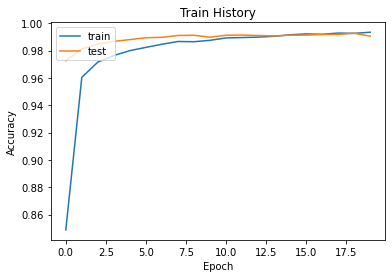

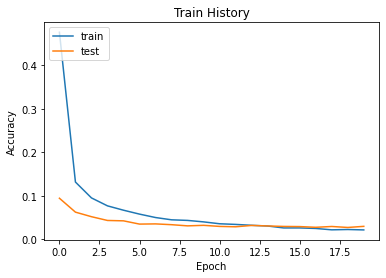

In [11]:
###可视化训练过程
##调用准确率
show_train_history('acc','val_acc')
##调用损失
show_train_history('loss','val_loss')

In [12]:
###5.评估模型的precision
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

10000/10000 [==============================] - 2s 167us/step


0.9927

In [13]:
###6.predict
prediction=model.predict_classes(x_Test4D_normalize)
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [14]:
###7.可视化预测结果
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1 + i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" + str(labels[idx]) +
                     ",predict=" + str(prediction[idx])
                     , fontsize=10)

        ax.set_xticks([]);
        ax.set_yticks([])
        idx += 1
    plt.show()

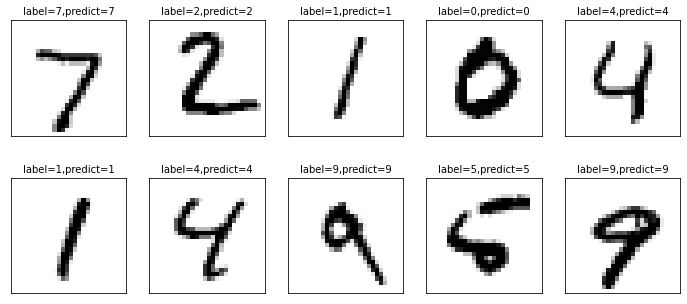

In [15]:
###7.可视化预测结果
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

In [16]:
###模型预测结果可视化
def drawDigit3(position, image, title, isTrue):
    plt.subplot(*position)
    plt.imshow(image.reshape(-1, 28), cmap='gray_r')
    plt.axis('off')
    if not isTrue:
        plt.title(title, color='red')
    else:
        plt.title(title)

In [17]:
def batchDraw3(batch_size, test_X, test_y):
    selected_index = random.sample(range(len(test_y)), k=batch_size)
    images = test_X[selected_index]
    labels = test_y[selected_index]
    predict_labels = model.predict(images)
    image_number = images.shape[0]
    row_number = math.ceil(image_number ** 0.5)
    column_number = row_number
    plt.figure(figsize=(row_number + 8, column_number + 8))
    for i in range(row_number):
        for j in range(column_number):
            index = i * column_number + j
            if index < image_number:
                position = (row_number, column_number, index + 1)
                image = images[index]
                actual = np.argmax(labels[index])
                predict = np.argmax(predict_labels[index])
                isTrue = actual == predict
                title = 'actual:%d\npredict:%d' % (actual, predict)
                drawDigit3(position, image, title, isTrue)

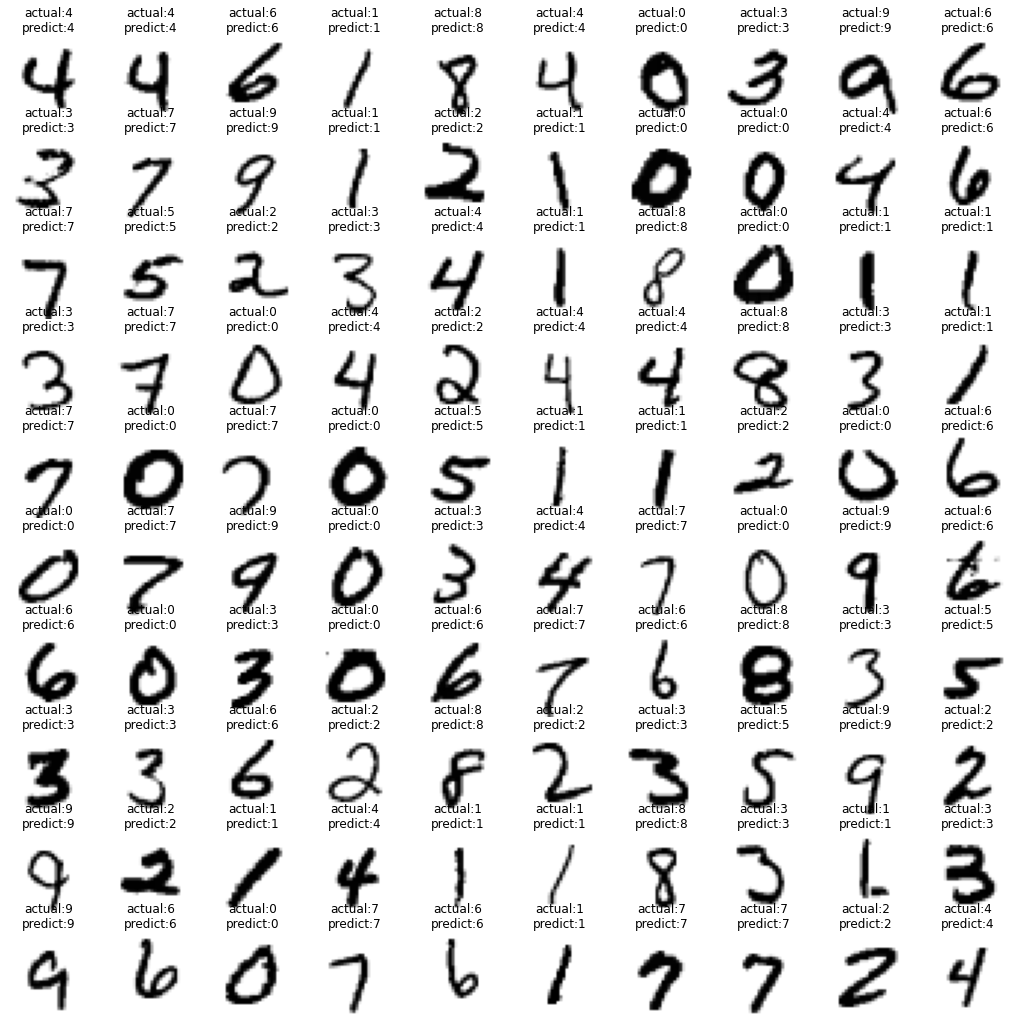

In [18]:
###模型预测结果可视化
    batchDraw3(100, x_Test4D_normalize, y_TestOneHot)
    plt.show()
###模型预测结果可视化

In [19]:
###8.混淆矩阵
    a = pd.crosstab(y_Test,prediction,rownames=['label'],colnames=['predict'])
    print(a)
    df = pd.DataFrame({'label':y_Test, 'predict':prediction})
    b = df[(df.label==5)&(df.predict==3)]
    print(b)

predict    0     1     2     3    4    5    6     7    8    9
label                                                        
0        976     0     0     0    0    0    1     1    2    0
1          0  1134     1     0    0    0    0     0    0    0
2          3     2  1019     0    1    0    0     5    2    0
3          0     0     1  1006    0    1    0     0    2    0
4          0     0     0     0  980    0    1     0    0    1
5          1     0     0     4    0  885    1     1    0    0
6          1     3     0     0    1    2  950     0    1    0
7          0     4     0     0    0    0    0  1022    1    1
8          2     2     0     0    0    0    0     2  965    3
9          1     2     0     1   11    2    0     2    0  990
      label  predict
1393      5        3
2035      5        3
2369      5        3
2597      5        3
